In [1]:
%load_ext autoreload
%autoreload 2

In [159]:
import ast
import xarray as xr
import matplotlib.pyplot as plt
from src.data_generator import *
from src.train import *
from src.utils import *

In [3]:
from src.networks import *

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"]=str(0)
limit_mem()

In [3]:
args = load_args('../nn_configs/B/63-resnet_d3_best.yml')

In [6]:
ds = xr.merge(
    [xr.open_mfdataset(f'{args["datadir"]}/{var}/*.nc', combine='by_coords')
     for var in args["var_dict"].keys()],
    fill_value=0  # For the 'tisr' NaNs
)

In [7]:
ds_train = ds.sel(time=slice('2018', '2018'))

In [50]:
dg_train = DataGenerator(
    ds_train, args['var_dict'], 200, batch_size=args['batch_size'], 
    output_vars=args['output_vars'],
    data_subsample=2, norm_subsample=1000, nt_in=1, dt_in=1, cont_time=False
)

DG start 13:28:42.854250
DG normalize 13:28:42.882404
DG load 13:28:48.358815
Loading data into RAM
DG done 13:28:54.301734


In [51]:
dg_train.shape

(32, 64, 38)

## Continuous time

In [45]:
X, y = dg_train[0]

In [46]:
X[:, 0, 0, -1]

array([1.66, 1.12, 0.56, 1.34, 0.36, 0.92, 0.46, 1.4 , 1.7 , 1.86, 0.72,
       0.08, 1.52, 1.6 , 1.76, 0.26, 0.06, 0.48, 1.22, 0.38, 0.06, 1.44,
       1.08, 0.7 , 0.8 , 1.12, 1.2 , 0.34, 0.6 , 0.82, 0.2 , 1.86],
      dtype=float32)

In [9]:
dg_train.data

<xarray.DataArray 'z' (time: 8760, lat: 32, lon: 64, level: 38)>
array([[[[ 0.43167361, -0.77058204, -0.91708119, ...,  1.44426201,
           2.57085561, -1.67874412],
         [ 0.43111803, -0.76282004, -0.90433586, ...,  1.44426201,
           2.63684811, -1.67874412],
         [ 0.43111803, -0.75625012, -0.89355009, ...,  1.44426201,
           2.70122081, -1.67874412],
         ...,
         [ 0.43445417, -0.80103756, -0.95531952, ...,  1.44426201,
           2.40688572, -1.67874412],
         [ 0.433343  , -0.78969222, -0.94257419, ...,  1.44426201,
           2.47378905, -1.67874412],
         [ 0.43222919, -0.77954038, -0.92982769, ...,  1.44426201,
           2.52247395, -1.67874412]],

        [[ 0.41999842, -0.90912588, -1.08180004, ...,  1.44426201,
           2.06275586, -1.57043805],
         [ 0.41555111, -0.87329536, -1.03081639, ...,  1.44426201,
           2.33441714, -1.57043805],
         [ 0.40887882, -0.84045142, -0.9759101 , ...,  1.44426201,
           2.4794585 , -1.57043805],
         ...,
         [ 0.42611513, -0.97959059, -1.17984706, ...,  1.44426201,
           1.50808802, -1.57043805],
         [ 0.42444574, -0.96705033, -1.16023742, ...,  1.44426201,
           1.76416741, -1.57043805],
         [ 0.42277899, -0.94137307, -1.12690267, ...,  1.44426201,
           1.87833927, -1.57043805]],

        [[ 0.37941175, -1.02079469, -1.13670632, ...,  1.44426201,
           2.80071523, -1.46213197],
         [ 0.37663383, -1.00288085, -1.10827282, ...,  1.44426201,
           3.12389527, -1.46213197],
         [ 0.37162829, -0.9807855 , -1.0876834 , ...,  1.44426201,
           3.37895707, -1.46213197],
         ...,
         [ 0.37885616, -1.03512662, -1.15925647, ...,  1.44426201,
           0.85969458, -1.46213197],
         [ 0.37941175, -1.03930812, -1.17004224, ...,  1.44426201,
           2.03308297, -1.46213197],
         [ 0.38052556, -1.03393312, -1.16023742, ...,  1.44426201,
           2.49159806, -1.46213197]],

        ...,

        [[-1.81667652, -1.40477293, -1.19553407, ..., -0.73436932,
          -0.44150882,  1.46213197],
         [-1.79332615, -1.38685909, -1.17886611, ..., -0.73436932,
          -0.44090151,  1.46213197],
         [-1.77164253, -1.37491558, -1.18376852, ..., -0.73436932,
          -0.44191369,  1.46213197],
         ...,
         [-1.89506666, -1.42567478, -1.22004495, ..., -0.7343693 ,
          -0.435842  ,  1.46213197],
         [-1.87060513, -1.42985486, -1.26122612, ..., -0.73436932,
          -0.44120516,  1.46213197],
         [-1.8428048 , -1.42149469, -1.24455933, ..., -0.73436932,
          -0.441104  ,  1.46213197]],

        [[-2.04740494, -1.4758358 , -1.36025292, ..., -0.73436932,
          -0.44130638,  1.57043805],
         [-2.03961884, -1.46628213, -1.3141705 , ..., -0.73436932,
          -0.44069907,  1.57043805],
         [-2.03239361, -1.45374046, -1.28181554, ..., -0.73436932,
          -0.44241978,  1.57043805],
         ...,
         [-2.07464704, -1.52062325, -1.44065103, ...,  1.06439006,
          -0.28301559,  1.57043805],
         [-2.06575242, -1.50270941, -1.42202234, ..., -0.29933311,
          -0.39848176,  1.57043805],
         [-2.05574398, -1.48598764, -1.39947219, ..., -0.73436932,
          -0.44373519,  1.57043805]],

        [[-2.10244737, -1.59347779, -1.52399082, ..., -0.73436932,
          -0.44130638,  1.67874412],
         [-2.10244737, -1.58989588, -1.52301104, ..., -0.73436932,
          -0.44110395,  1.67874412],
         [-2.10188914, -1.58631254, -1.52301104, ..., -0.73436932,
          -0.44080029,  1.67874412],
         ...,
         [-2.10133356, -1.60362963, -1.52399082, ..., -0.73436932,
          -0.43999064,  1.67874412],
         [-2.10188914, -1.60064446, -1.52399082, ..., -0.73436932,
          -0.44191358,  1.67874412],
         [-2.10244737, -1.59706113, -1.52399082, ..., -0.73436932,
          -0.44161007,  1.67874412]]],


       [[[ 0.42500132, -0.77834546, -0.92786696, ...,  1.44426201,
           2

In [11]:
i=0
idxs = dg_train.idxs[i * dg_train.batch_size:(i + 1) * dg_train.batch_size]

In [12]:
idxs

array([6925, 6450, 4360, 3770, 5444, 5884, 2462, 3756, 7259, 4240,  424,
       8465, 2979, 4272, 1996, 3134, 4536,  863, 6409, 6736, 6965, 7059,
       7214, 6084, 2882, 6824,   60,  513, 7350, 8104, 2973, 3368])

In [15]:
rand_nt = np.random.randint(1, dg_train.nt, dg_train.batch_size); rand_nt

array([ 5, 18,  4, 49, 40, 18, 17, 36, 62,  1, 51, 60, 43, 13, 22, 51, 50,
       29,  4, 43, 31, 24, 16, 32, 42, 39, 69, 46, 10, 33, 62,  6])

In [17]:
dg_train.dt, dg_train.nt

(1.0, 72)

In [18]:
X, y = dg_train[0]

In [19]:
X.shape

(32, 32, 64, 38)

In [24]:
len(dg_train.data.lat)

32

In [27]:
rand_time = (rand_nt * dg_train.dt / 100)[:, None, None] * np.ones((1, len(dg_train.data.lat), len(dg_train.data.lon)))

In [28]:
rand_time.shape

(32, 32, 64)

In [32]:
Xnew = np.concatenate([X, rand_time[..., None]], -1)

In [33]:
Xnew.shape

(32, 32, 64, 39)

In [47]:
dg_train.shape

AttributeError: 'DataGenerator' object has no attribute 'shape'

### Evaluate trained model

In [303]:
args = load_args('../nn_configs/B/95-resnet_cont_rmse.yml')

In [121]:
valdir = args['datadir']
z500_valid = load_test_data(f'{valdir}geopotential_500', 'z').drop('level')
t850_valid = load_test_data(f'{valdir}temperature_850', 't').drop('level')
valid = xr.merge([z500_valid, t850_valid])

In [304]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': tf.keras.losses.mse})


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

ValueError: Unknown loss function:lat_rmse

In [305]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [306]:
args['ext_mean'] = mean
args['ext_std'] = std

In [307]:
args['test_years'] = ['2017', '2017']

In [308]:
dg = load_data(**args, only_test=True)

DG start 13:26:20.629075
DG normalize 13:26:20.663779
DG load 13:26:20.676254
Loading data into RAM
DG done 13:26:25.540034


In [309]:
def create_cont_predictions(model, dg, max_lead_time=120, dt=12, lead_time=None):
    dg.fixed_time = True
    lead_time = np.arange(dt, max_lead_time+dt, dt) if lead_time is None else lead_time
    lead_time = xr.DataArray(lead_time, dims={'lead_time': lead_time}, name='lead_time')
    preds = []
    for l in tqdm(lead_time):
        dg.lead_time = l.values; dg.on_epoch_end()
        p = create_predictions(model, dg)
        p['time'] = dg.init_time
        preds.append(p)
    return xr.concat(preds, lead_time)

In [310]:
lead_time = np.concatenate([np.arange(2, 6, 2), np.arange(6, 24, 6), np.arange(24, 120, 12), np.arange(120, 336+1, 24)])

In [311]:
preds = create_cont_predictions(model, dg, lead_time=lead_time)

In [312]:
preds.to_netcdf('./preds_cont_rmse.nc')

In [313]:
preds

<xarray.Dataset>
Dimensions:    (lat: 32, lead_time: 23, lon: 64, time: 4377)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2017-01-01T04:00:00 ... 2017-12-31T20:00:00
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t          (lead_time, time, lat, lon) float64 257.4 257.5 257.5 ... nan nan
    z          (lead_time, time, lat, lon) float64 5.089e+04 5.091e+04 ... nan

In [314]:
scores = evaluate_iterative_forecast(preds, valid, compute_weighted_rmse).load(); scores

<xarray.Dataset>
Dimensions:    (lead_time: 23)
Coordinates:
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t_rmse     (lead_time) float64 1.168 1.267 1.369 1.566 ... 5.186 5.748 6.285
    z_rmse     (lead_time) float64 153.9 156.3 166.9 ... 1.117e+03 1.159e+03

In [317]:
!ls *.nc

baseline_rmses.nc	       preds_cont.nc	   rmse_cont_rmse.nc
bilinear_64x128_32x64_peri.nc  preds_cont_rmse.nc  rmse_direct.nc
bilinear_91x180_32x64_peri.nc  rmse_cont.nc	   weyn_rmse.nc


In [318]:
scores.to_netcdf('./rmse_cont_rmse2.nc')

In [320]:
scores.sel(lead_time=[6, 72, 120])

<xarray.Dataset>
Dimensions:    (lead_time: 3)
Coordinates:
  * lead_time  (lead_time) int64 6 72 120
Data variables:
    t_rmse     (lead_time) float64 1.369 2.459 3.041
    z_rmse     (lead_time) float64 166.9 487.6 665.2

In [184]:
scores.sel(lead_time=[72, 120])

<xarray.Dataset>
Dimensions:    (lead_time: 2)
Coordinates:
  * lead_time  (lead_time) int64 72 120
Data variables:
    t_rmse     (lead_time) float64 1.866 2.587
    z_rmse     (lead_time) float64 323.8 552.0

In [163]:
rmses = xr.open_dataset('./baseline_rmses.nc')
rmse_weyn = xr.open_dataset('./weyn_rmse.nc')

In [170]:
336/24

14.0

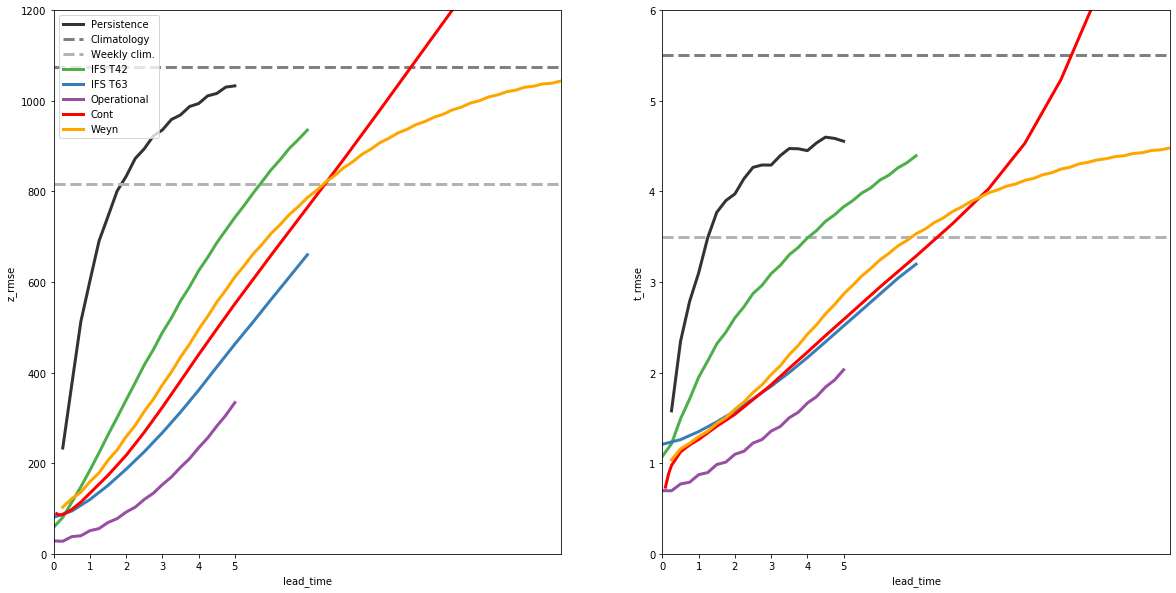

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_rmses(rmses, 'z', ax=ax1)
plot_rmses(rmses, 't', ax=ax2)
# ax1.plot(lead_times, [p.z_rmse for p in preds], lw=3, c='r', label='Rasp')
# ax2.plot(lead_times, [p.t_rmse for p in preds], lw=3, c='r')
scores.z_rmse.plot(ax=ax1, lw=3, c='r', label='Cont')
scores.t_rmse.plot(ax=ax2, lw=3, c='r')
rmse_weyn.z_rmse.plot(ax=ax1, lw=3, c='orange', label='Weyn')
rmse_weyn.t_rmse.plot(ax=ax2, lw=3, c='orange')
for ax in [ax1, ax2]: ax.set_xlim(0, 336)
ax1.legend(loc=2, ncol=1, fontsize=10)

## RMSE

In [286]:
args = load_args('../nn_configs/B/97-resnet_cont_rmse.yml')

In [288]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_rmse': tf.keras.losses.mse})


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [289]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [290]:
args['ext_mean'] = mean
args['ext_std'] = std

In [291]:
args['test_years'] = ['2017', '2017']

In [292]:
dg = load_data(**args, only_test=True)

DG start 10:02:45.205063
DG normalize 10:02:45.241472
DG load 10:02:45.250535
Loading data into RAM
DG done 10:02:49.626501


In [294]:
lead_time = np.concatenate([np.arange(2, 6, 2), np.arange(6, 24, 6), np.arange(24, 120, 12), np.arange(120, 336+1, 24)])

In [295]:
preds = create_cont_predictions(model, dg, lead_time=lead_time)

In [296]:
preds.to_netcdf('./preds_cont_rmse.nc')

In [297]:
preds

<xarray.Dataset>
Dimensions:    (lat: 32, lead_time: 23, lon: 64, time: 4377)
Coordinates:
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time       (time) datetime64[ns] 2017-01-01T04:00:00 ... 2017-12-31T20:00:00
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t          (lead_time, time, lat, lon) float64 257.4 257.5 257.6 ... nan nan
    z          (lead_time, time, lat, lon) float64 5.089e+04 5.092e+04 ... nan

In [298]:
scores = evaluate_iterative_forecast(preds, valid, compute_weighted_rmse).load(); scores

<xarray.Dataset>
Dimensions:    (lead_time: 23)
Coordinates:
  * lead_time  (lead_time) int64 2 4 6 12 18 24 36 ... 216 240 264 288 312 336
Data variables:
    t_rmse     (lead_time) float64 0.931 1.05 1.167 1.384 ... 4.961 5.483 6.007
    z_rmse     (lead_time) float64 120.2 112.1 115.7 ... 1.087e+03 1.131e+03

In [299]:
scores.to_netcdf('./rmse_cont_rmse.nc')

In [301]:
dg[0][1].shape

(32, 32, 64, 2)

In [ ]:
t

## Erm, did I do this wrong all along?

In [284]:
args = load_args('../nn_configs/B/81-resnet_d3_dr_0.1.yml')

In [285]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_rmse': tf.keras.losses.mse})

ValueError: Unknown loss function:lat_mse

In [ ]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [ ]:
args['ext_mean'] = mean
args['ext_std'] = std

In [ ]:
args['test_years'] = ['2017', '2017']

In [ ]:
args['data_subsample']

In [ ]:
dg = load_data(**args, only_test=True, test_data_subsample=2)

In [115]:
preds = create_predictions(model, dg)

In [116]:
compute_weighted_rmse(preds, valid).load()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t_rmse   float64 1.826
    z_rmse   float64 315.5

In [117]:
dg = load_data(**args, only_test=True, test_data_subsample=1)

DG start 10:21:43.098437
DG normalize 10:21:43.132543
DG load 10:21:43.143283
Loading data into RAM
DG done 10:21:50.287091


In [118]:
preds = create_predictions(model, dg)

In [119]:
compute_weighted_rmse(preds, valid).load()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t_rmse   float64 1.84
    z_rmse   float64 319.9

## Multi-dt training

In [79]:
args['var_dict']

{'geopotential': ('z', [50, 250, 500, 600, 700, 850, 925]),
 'temperature': ('t', [50, 250, 500, 600, 700, 850, 925]),
 'u_component_of_wind': ('u', [50, 250, 500, 600, 700, 850, 925]),
 'v_component_of_wind': ('v', [50, 250, 500, 600, 700, 850, 925]),
 'specific_humidity': ('v', [50, 250, 500, 600, 700, 850, 925]),
 'constants': ['lsm', 'orography', 'lat2d']}

In [80]:
args['output_vars']

['z_500', 't_850']

In [105]:
output_vars = ['z_*', 't_*', 'u_*', 'v_*', 'q_*']

In [143]:
dg_train = DataGenerator(
    ds_train, args['var_dict'], 12, batch_size=args['batch_size'], 
    output_vars=output_vars,
    data_subsample=2, norm_subsample=1000, nt_in=1, dt_in=1, multi_dt=3
)

DG start 16:55:46.604569
DG normalize 16:55:46.664649
DG load 16:55:50.763677
Loading data into RAM
DG done 16:55:55.842879


In [144]:
X, y = dg_train[0]

In [145]:
len(X), len(y)

(2, 3)

In [109]:
X[0].shape, X[1].shape

((32, 32, 64, 35), (32, 32, 64, 3))

In [110]:
y[0].shape, y[1].shape

((32, 32, 64, 35), (32, 32, 64, 35))

### now the model

In [146]:
model = build_resnet(
    [64, 64, 35], [7, 3, 3], input_shape=dg_train.shape,
    bn_position=args['bn_position'], use_bias=args['use_bias'], l2=args['l2'], skip=args['skip'],
    dropout=args['dropout'], activation=args['activation']
)

In [147]:
ndiff = 3
const_inp = Input((32, 64, len(dg_train.const_idxs)))
x = inp = Input((32, 64, len(dg_train.not_const_idxs)))
outputs = []
for _ in range(ndiff):
    x = model(Concatenate()([x, const_inp]))
    outputs.append(x)
model2 = keras.models.Model([inp, const_inp], outputs)

In [148]:
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 32, 64, 35)] 0                                            
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
concatenate_12 (Concatenate)    (None, 32, 64, 38)   0           input_20[0][0]                   
                                                                 input_19[0][0]                   
__________________________________________________________________________________________________
model_6 (Model)                 (None, 32, 64, 35)   214051      concatenate_12[0][0]       

In [162]:
model2.layers[3].set_weights(model2.layers[3].get_weights())

In [149]:
preds = model2.predict(X)

In [150]:
len(preds)

3

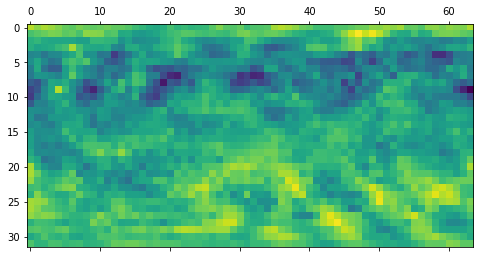

In [151]:
plt.matshow(preds[0][0, :, :, 0])

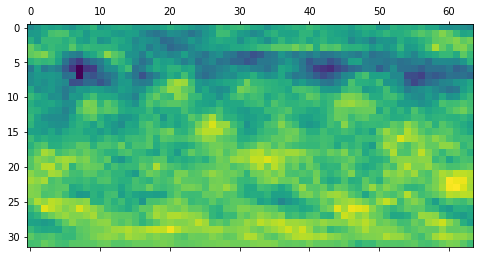

In [152]:
plt.matshow(preds[1][0, :, :, 0])

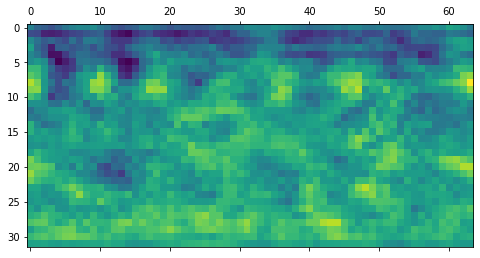

In [153]:
plt.matshow(preds[2][0, :, :, 0])

In [154]:
model2.compile('adam', 'mse')

In [155]:
model2.fit(dg_train)

Train for 137 steps
137/137 [==============================] - 15s 111ms/step - loss: 1.7237 - model_6_loss: 0.5212 - model_6_1_loss: 0.5786 - model_6_2_loss: 0.6217


In [163]:
from src.networks import *

In [166]:
model3 = create_multi_dt_model(model, 2, dg_train)

## Analyze multi-dt run

In [242]:
args = load_args('../nn_configs/B/92-resnet_multi_dt.yml')

In [243]:
args['var_dict']

{'geopotential': ('z', [50, 250, 500, 600, 700, 850, 925]),
 'temperature': ('t', [50, 250, 500, 600, 700, 850, 925]),
 'u_component_of_wind': ('u', [50, 250, 500, 600, 700, 850, 925]),
 'v_component_of_wind': ('v', [50, 250, 500, 600, 700, 850, 925]),
 'specific_humidity': ('q', [50, 250, 500, 600, 700, 850, 925]),
 'constants': ['lsm', 'orography', 'lat2d']}

In [244]:
args['train_years'] = ['2015', '2015']

In [245]:
mean = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_mean.nc")
std = xr.open_dataarray(f"{args['model_save_dir']}/{args['exp_id']}_std.nc")

In [253]:
mean = mean.drop('level_names')
std = std.drop('level_names')

In [254]:
args['ext_mean'] = mean
args['ext_std'] = std

In [255]:
args['test_years'] = ['2017', '2017']

In [256]:
dg = load_data(**args, only_test=True)

DG start 09:50:45.028397
DG normalize 09:50:45.061479
DG load 09:50:45.066185
Loading data into RAM
DG done 09:50:49.925030


In [257]:
dg.data.level_names

<xarray.DataArray 'level_names' (level: 38)>
array(['z_50', 'z_250', 'z_500', 'z_600', 'z_700', 'z_850', 'z_925',
       't_50', 't_250', 't_500', 't_600', 't_700', 't_850', 't_925',
       'u_50', 'u_250', 'u_500', 'u_600', 'u_700', 'u_850', 'u_925',
       'v_50', 'v_250', 'v_500', 'v_600', 'v_700', 'v_850', 'v_925',
       'q_50', 'q_250', 'q_500', 'q_600', 'q_700', 'q_850', 'q_925',
       'lsm', 'orography', 'lat2d'], dtype='<U9')
Coordinates:
  * level        (level) int64 50 250 500 600 700 850 925 ... 700 850 925 1 1 1
    level_names  (level) <U9 'z_50' 'z_250' 'z_500' ... 'orography' 'lat2d'

In [260]:
model = keras.models.load_model(f"{args['model_save_dir']}/{args['exp_id']}.h5", 
                                custom_objects={'PeriodicConv2D': PeriodicConv2D, 'lat_mse': tf.keras.losses.mse})


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [261]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 64, 35)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 64, 38)   0           input_3[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
model (Model)                   (None, 32, 64, 35)   5906979     concatenate[0][0]          

In [264]:
dg.init_time

<xarray.DataArray 'time' (time: 4374)>
array(['2017-01-01T00:00:00.000000000', '2017-01-01T02:00:00.000000000',
       '2017-01-01T04:00:00.000000000', ..., '2017-12-31T06:00:00.000000000',
       '2017-12-31T08:00:00.000000000', '2017-12-31T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-12-31T10:00:00
Attributes:
    long_name:  time

In [265]:
dg.valid_time

<xarray.DataArray 'time' (time: 4374)>
array(['2017-01-01T12:00:00.000000000', '2017-01-01T14:00:00.000000000',
       '2017-01-01T16:00:00.000000000', ..., '2017-12-31T18:00:00.000000000',
       '2017-12-31T20:00:00.000000000', '2017-12-31T22:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-31T22:00:00
Attributes:
    long_name:  time

In [262]:
preds = create_predictions(model, dg, multi_dt=True)

In [268]:
preds['time'] = preds['time'] - np.timedelta64(6, 'h')

In [270]:
preds.z.sel(level=500)

<xarray.DataArray 'z' (time: 4374, lat: 32, lon: 64)>
array([[[50869.53276091, 50918.65132481, 50910.12389347, ...,
         50853.5251302 , 50824.06927371, 50819.9705371 ],
        [50561.88835664, 50660.52921698, 50695.88297365, ...,
         50408.86115497, 50417.15469707, 50464.59813571],
        [50540.25056205, 50744.08482956, 50878.07215019, ...,
         50211.33784333, 50294.08315333, 50406.45902738],
        ...,
        [50710.94714301, 50647.74151548, 50583.47750876, ...,
         50874.85890932, 50819.22671258, 50764.34259658],
        [51079.72743746, 51199.52291047, 51253.27953442, ...,
         50656.61147092, 50792.12555726, 50927.69740654],
        [51346.97264428, 51472.47610912, 51563.77641453, ...,
         51022.64285747, 51092.99751018, 51212.41944951]],

       [[50874.81249629, 50934.59146408, 50946.81653428, ...,
         50824.96875415, 50796.61748721, 50808.38795294],
        [50618.8235637 , 50721.30616623, 50776.05509669, ...,
         50432.20022015, 50446.62474095, 50514.62489516],
        [50572.05220193, 50790.9461799 , 50913.47090115, ...,
         50228.60997573, 50313.96779203, 50417.59166865],
        ...,
        [50711.51099037, 50682.87192212, 50568.51062435, ...,
         50860.69503111, 50790.15979321, 50752.28635631],
        [51034.0478966 , 51155.56227309, 51232.8861765 , ...,
         50665.60830215, 50778.86663178, 50904.74342763],
        [51362.0538385 , 51487.23585766, 51578.73640792, ...,
         51063.79094637, 51114.63550745, 51226.00448225]],

       [[50899.43491212, 50949.22839036, 50973.67630131, ...,
         50824.52874243, 50810.87257006, 50834.43153976],
        [50686.03935799, 50788.524798  , 50845.68315242, ...,
         50438.64696959, 50490.3417606 , 50573.4543213 ],
        [50614.96621538, 50811.39243652, 50932.10907641, ...,
         50227.9877574 , 50326.78873255, 50449.82865868],
        ...,
        [50777.23771688, 50770.70300563, 50651.42010271, ...,
         50852.53241834, 50825.07434886, 50797.69167522],
        [51144.85788829, 51268.19919509, 51349.87355992, ...,
         50762.78238917, 50884.53085758, 51018.25307672],
        [51445.73389474, 51570.56508004, 51658.05141   , ...,
         51154.16927419, 51206.91210788, 51313.20686176]],

       ...,

       [[51173.30279199, 51140.69855126, 51117.37671363, ...,
         51152.42179325, 51183.44677494, 51191.93995387],
        [50828.45297415, 50959.68490122, 51067.82482635, ...,
         50672.06153726, 50684.83545672, 50744.18231718],
        [50352.24415078, 50470.07446776, 50508.60498345, ...,
         50271.79395492, 50245.40297975, 50238.67369859],
        ...,
        [50284.57152257, 50332.72351994, 50308.33985759, ...,
         49790.01090651, 49971.3816734 , 50114.65362657],
        [49965.92317692, 50046.82128891, 50089.59383382, ...,
         49495.56584069, 49624.70026367, 49815.10191152],
        [49571.29812176, 49680.88840337, 49789.08791553, ...,
         49301.38142965, 49406.24852687, 49483.37198275]],

       [[51172.00930749, 51130.17657575, 51107.79799679, ...,
         51170.60901223, 51202.56387591, 51204.98383907],
        [50835.92648518, 50973.07272926, 51104.22236947, ...,
         50629.70853369, 50637.95059584, 50728.38830801],
        [50342.25825587, 50478.4734019 , 50558.87090174, ...,
         50279.79929035, 50211.11043976, 50241.93436588],
        ...,
        [50297.52866202, 50365.05293068, 50356.9766583 , ...,
         49801.24569697, 49973.27021751, 50137.2200871 ],
        [49973.83568629, 50063.05287768, 50119.58840573, ...,
         49515.49020408, 49628.911486  , 49805.08642578],
        [49610.90282545, 49712.20807739, 49808.76460765, ...,
         49346.54637366, 49439.5986189 , 49513.77353004]],

       [[51217.33760915, 51179.28905933, 51146.95316293, ...,
         51223.46716912, 51251.63521607, 51253.09489569],
        [50825.02773316, 50952.02472468, 51065.67442357, ...,
         50562.18507575, 50582.34859797, 50699.67627604],
        [50329.897

In [271]:
z500_valid

<xarray.DataArray 'z' (time: 17520, lat: 32, lon: 64)>
dask.array<getitem, shape=(17520, 32, 64), dtype=float32, chunksize=(8760, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-12-31T23:00:00
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential

In [269]:
compute_weighted_rmse(preds.z.sel(level=500), z500_valid).load()

<xarray.DataArray 'z_rmse' ()>
array(266.67013509)
Coordinates:
    level    int64 500

In [273]:
compute_weighted_rmse(preds.t.sel(level=850), t850_valid).load()

<xarray.DataArray 't_rmse' ()>
array(2.18305728)
Coordinates:
    level    int64 850

In [224]:
%debug

> /home/rasp/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py(786)merge()
    784         if not isinstance(obj, (DataArray, Dataset, dict)):
    785             raise TypeError(
--> 786                 "objects must be an iterable containing only "
    787                 "Dataset(s), DataArray(s), and dictionaries."
    788             )



ipdb>  u


> /home/rasp/repositories/myWeatherBench/devlog/src/data_generator.py(210)create_predictions()
    208         if not 'level' in da.dims: da = da.drop('level')
    209         das[v] = da
--> 210     return xr.merge(das)
    211 
    212 # TODO: Outdated



ipdb>  u


> <ipython-input-223-66f174ee238d>(1)<module>()
----> 1 preds = create_predictions(model, dg, multi_dt=True)



ipdb>  d


> /home/rasp/repositories/myWeatherBench/devlog/src/data_generator.py(210)create_predictions()
    208         if not 'level' in da.dims: da = da.drop('level')
    209         das[v] = da
--> 210     return xr.merge(das)
    211 
    212 # TODO: Outdated



ipdb>  das


{'v': <xarray.DataArray (time: 4374, lat: 32, lon: 64, level: 14)>
array([[[[ 1.80036759e+00, -1.23199462e+00, -5.11723555e+00, ...,
          -9.36584535e+00, -5.26725008e+00, -5.20491459e+00],
         [ 1.54687348e+00, -1.79984553e+00, -5.33537290e+00, ...,
          -8.75857897e+00, -5.57587363e+00, -5.59405423e+00],
         [ 1.31007070e+00, -2.08015233e+00, -5.35726576e+00, ...,
          -7.98651425e+00, -5.78687346e+00, -5.86044075e+00],
         ...,
         [ 2.98237934e+00, -2.03264813e-01, -4.19659505e+00, ...,
          -8.67529051e+00, -3.58249173e+00, -3.62142666e+00],
         [ 2.47003433e+00, -3.08403693e-01, -4.53797807e+00, ...,
          -9.32018655e+00, -4.27997624e+00, -4.25080705e+00],
         [ 2.08269566e+00, -6.35474987e-01, -4.79367899e+00, ...,
          -9.47080968e+00, -4.79083046e+00, -4.72570875e+00]],

        [[ 3.44643334e-01, -3.98041123e+00, -7.29742368e+00, ...,
          -7.62860233e+00, -5.56130063e+00, -5.48324705e+00],
         [-1.00047603

ipdb>  [(k, v.level) for k, v, in das.items()]


[('v', <xarray.DataArray 'level' (level: 14)>
array([ 50, 250, 500, 600, 700, 850, 925,  50, 250, 500, 600, 700, 850, 925])
Coordinates:
  * level    (level) int64 50 250 500 600 700 850 925 50 250 500 600 700 850 925), ('u', <xarray.DataArray 'level' (level: 7)>
array([ 50, 250, 500, 600, 700, 850, 925])
Coordinates:
  * level    (level) int64 50 250 500 600 700 850 925), ('t', <xarray.DataArray 'level' (level: 7)>
array([ 50, 250, 500, 600, 700, 850, 925])
Coordinates:
  * level    (level) int64 50 250 500 600 700 850 925), ('z', <xarray.DataArray 'level' (level: 7)>
array([ 50, 250, 500, 600, 700, 850, 925])
Coordinates:
  * level    (level) int64 50 250 500 600 700 850 925)]


ipdb>  dg.data.isel(level=dg.output_idxs).level_names


<xarray.DataArray 'level_names' (level: 35)>
array(['z_50', 'z_250', 'z_500', 'z_600', 'z_700', 'z_850', 'z_925',
       't_50', 't_250', 't_500', 't_600', 't_700', 't_850', 't_925',
       'u_50', 'u_250', 'u_500', 'u_600', 'u_700', 'u_850', 'u_925',
       'v_50', 'v_250', 'v_500', 'v_600', 'v_700', 'v_850', 'v_925',
       'v_50', 'v_250', 'v_500', 'v_600', 'v_700', 'v_850', 'v_925'],
      dtype='<U9')
Coordinates:
  * level        (level) int64 50 250 500 600 700 850 ... 500 600 700 850 925
    level_names  (level) <U9 'z_50' 'z_250' 'z_500' ... 'v_700' 'v_850' 'v_925'


ipdb>  q


In [ ]:
preds

In [ ]:
xr.merge()